Optimal cost: 9.235276180410084
Heater state: [0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
Indoor temperature: [20.         20.5        20.96703709 21.43732068 21.94003522 22.4960317
 23.117019   23.8053171  22.55419492 21.54877542 20.74745127 20.10571885
 19.57810988 19.12029889 18.69123191 18.25512142 19.78316267 19.0548464
 18.27877129 19.45089416 18.37639522 19.2887557  20.00632674 18.57268136]


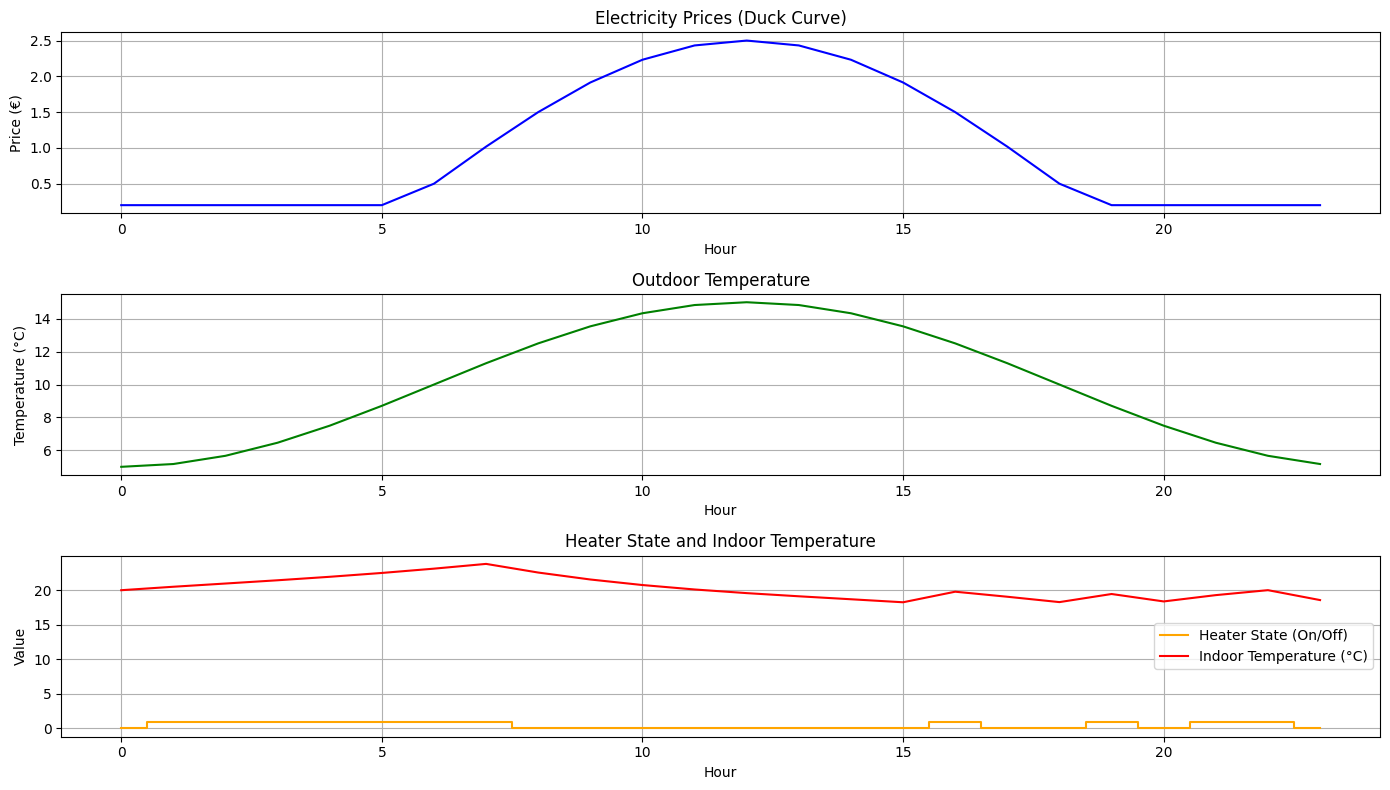

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Parameters
time_steps = 24  # 24 hours in a day
hours = np.arange(time_steps)

# Simulate duck curve prices (toy example)
prices = 0.5 + 2 * np.sin(2 * np.pi * hours / 24 - np.pi / 2)
prices = np.clip(prices, 0.2, 3)  # Clip to avoid negative prices

# Simulate outdoor temperature (cool at night, warm in the day)
outdoor_temperature = 10 + -5 * np.cos(2 * np.pi * hours / 24)

# Thermal properties
heat_loss = 0.1  # Heat loss rate per degree difference per hour
heating_power = 2  # Heating rate (degrees per hour)
min_temperature = 18  # Minimum temperature constraint (°C)
initial_temperature = 20  # Initial temperature (°C)

# Decision variables
heater_state = cp.Variable(time_steps, boolean=True)
indoor_temperature = cp.Variable(time_steps)

# Objective: Minimize cost
cost = cp.sum(cp.multiply(prices, heater_state * heating_power))
objective = cp.Minimize(cost)

# Constraints
constraints = []

# Initial temperature constraint
constraints.append(indoor_temperature[0] == initial_temperature)

# Minimum temperature constraint
constraints += [indoor_temperature >= min_temperature]

# Thermal dynamics constraints
for t in range(1, time_steps):
    heat_loss_effect = heat_loss * (indoor_temperature[t - 1] - outdoor_temperature[t - 1])
    constraints.append(
        indoor_temperature[t] == indoor_temperature[t - 1]
        + heater_state[t] * heating_power
        - heat_loss_effect
    )

# Problem definition
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Results
print("Optimal cost:", problem.value)
print("Heater state:", heater_state.value)
print("Indoor temperature:", indoor_temperature.value)

# Plot results
plt.figure(figsize=(14, 8))

# Plot electricity prices
plt.subplot(3, 1, 1)
plt.plot(hours, prices, label="Electricity Price (€)", color="blue")
plt.title("Electricity Prices (Duck Curve)")
plt.xlabel("Hour")
plt.ylabel("Price (€)")
plt.grid(True)

# Plot outdoor temperature
plt.subplot(3, 1, 2)
plt.plot(hours, outdoor_temperature, label="Outdoor Temperature (°C)", color="green")
plt.title("Outdoor Temperature")
plt.xlabel("Hour")
plt.ylabel("Temperature (°C)")
plt.grid(True)

# Plot heater state and indoor temperature
plt.subplot(3, 1, 3)
plt.step(hours, heater_state.value, label="Heater State (On/Off)", color="orange", where='mid')
plt.plot(hours, indoor_temperature.value, label="Indoor Temperature (°C)", color="red")
plt.title("Heater State and Indoor Temperature")
plt.xlabel("Hour")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
